In [1]:
import pandas as pd
sf = pd.read_csv('final_data.csv')
sf.drop(sf.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
sf.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue
0,Address: 1160 Mission Street #2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,"975,700"
1,Address: 260 King Street #475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,"975,700"
2,Address: 560 Missouri Street #B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,"1,277,600"
3,Address: 350 Missouri Street,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,"1,277,600"
4,Address: 3658 Folsom Street,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,"1,248,000"


In [2]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null object
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


In [3]:
sf['zindexvalue'] = sf['zindexvalue'].str.replace(',', '')
sf['zindexvalue'] = sf['zindexvalue'].convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [4]:
sf.lastsolddate.min(), sf.lastsolddate.max()

('01/02/2013', '12/31/2015')

In [5]:
sf.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


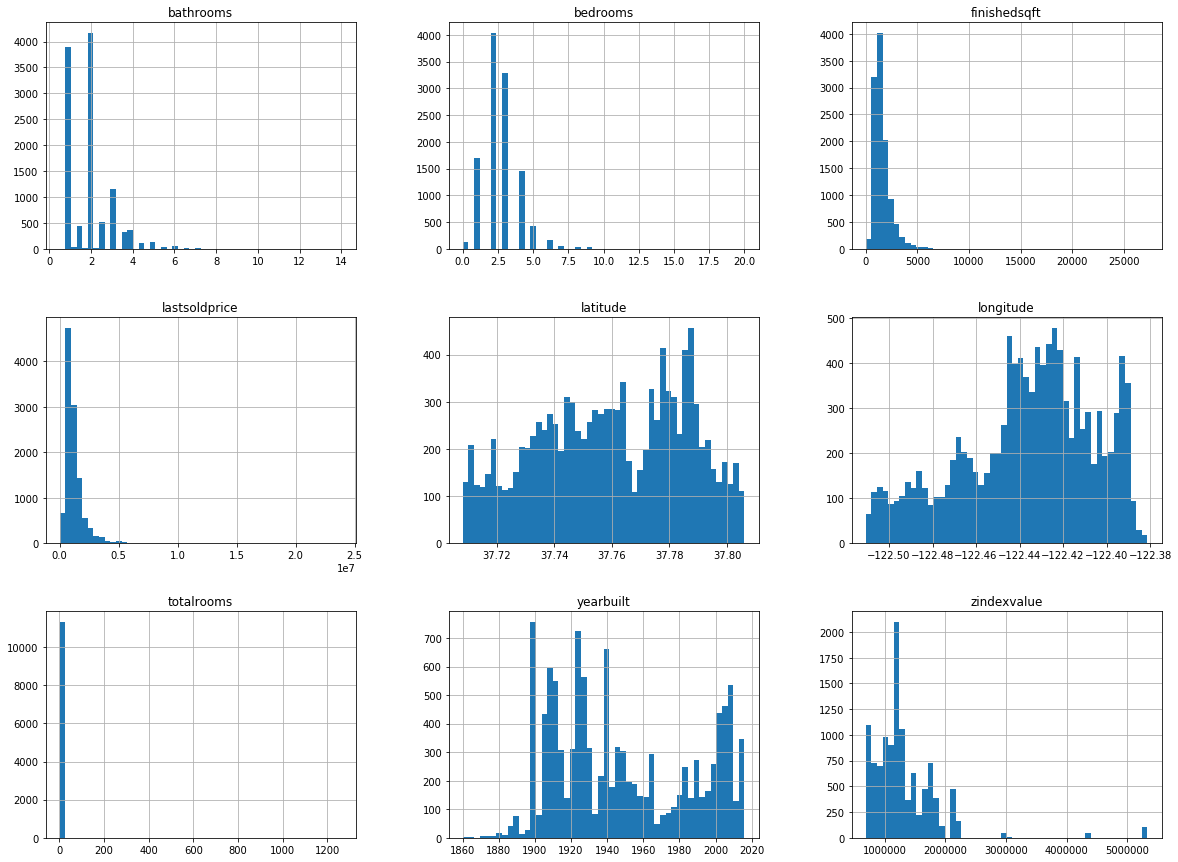

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Observations: 

1. These variables have very different scales. We will discuss this later in this chapter when we explore feature scaling.

2. Many histograms are right skewed: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

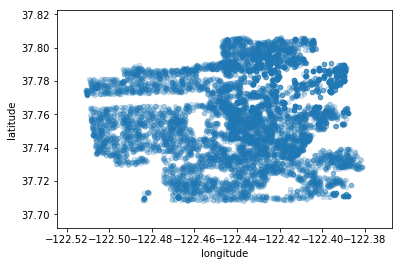

In [7]:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('map1.png')

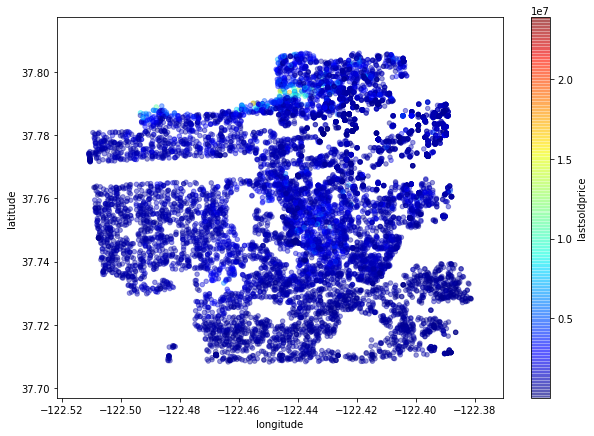

In [8]:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('map2.png')

Now let’s look at how much each independent variable correlates with the last sold price.

In [9]:
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

The last sold price tends to go up when the finished sqft and number of bathrooms go up. You can see a small negative correlation between the year built and the last sold price. Finally, coefficients close to zero mean that there is no linear correlation.

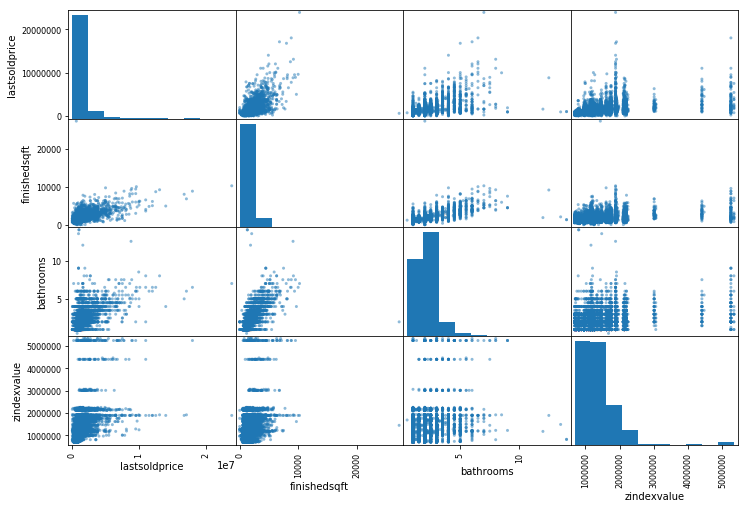

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["lastsoldprice", "finishedsqft", "bathrooms", "zindexvalue"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable to predict the sold price is the zestimate, so let’s zoom in on their correlation scatterplot

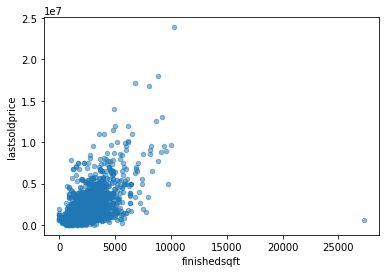

In [11]:
sf.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)
plt.savefig('scatter.png')

First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.

Because each neighborhood has the different home price, what we really want is the price per squre foot. So, we add a new variable "price_per_sqft". 

In [12]:
sf['price_per_sqft'] = sf['lastsoldprice']/sf['finishedsqft']

In [13]:
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice     1.000000
finishedsqft      0.647208
bathrooms         0.536880
zindexvalue       0.460429
bedrooms          0.395478
latitude          0.283107
totalrooms        0.093527
price_per_sqft    0.005008
longitude        -0.052595
yearbuilt        -0.189055
Name: lastsoldprice, dtype: float64

Unfortunately, the new price_per_sqft variable has only a very smalll positive correlation with the last sold price. But we still need this varaible for grouping neighborhood.

Also there are 71 neighborhoods in the data, we are going to group them.

In [14]:
len(sf['neighborhood'].value_counts())

71

In [15]:
freq = sf.groupby('neighborhood').count()['address']
#mean_price: average price per sqft
mean = sf.groupby('neighborhood').mean()['price_per_sqft']
cluster = pd.concat([freq, mean], axis=1)
cluster['neighborhood'] = cluster.index

In [16]:
cluster.columns = ['freq', 'price_per_sqft','neighborhood']

In [17]:
cluster.describe()

,freq,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


Cluster the neighborhood into three groups: 1. low price, 2. high price low frequency, 3. high price high frequency

In [18]:
cluster1 = cluster[cluster.price_per_sqft < 756]
cluster1.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

In [19]:
cluster_temp = cluster[cluster.price_per_sqft >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

In [20]:
cluster3 = cluster_temp[cluster_temp.freq >=123]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

Add group column based on the clusters

In [21]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
sf['group'] = sf.neighborhood.apply(get_group)

Now let's preprocess the categorical input feature, usecode

In [22]:
sf.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue,price_per_sqft,group
0,Address: 1160 Mission Street #2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,975700,1246.404602,high_price_high_freq
1,Address: 260 King Street #475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,975700,830.564784,high_price_high_freq
2,Address: 560 Missouri Street #B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1277600,1049.122807,high_price_high_freq
3,Address: 350 Missouri Street,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,1277600,1210.219632,high_price_high_freq
4,Address: 3658 Folsom Street,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1248000,1176.923077,high_price_high_freq


In [23]:
sf.drop(sf.columns[[0, 4, 6, 7, 8, 13]], axis=1, inplace=True)
sf.head()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,totalrooms,usecode,yearbuilt,zindexvalue,group
0,2.0,2.0,1043.0,1300000.0,4.0,Condominium,2007.0,975700,high_price_high_freq
1,1.0,1.0,903.0,750000.0,3.0,Condominium,2004.0,975700,high_price_high_freq
2,4.0,3.0,1425.0,1495000.0,6.0,Condominium,2003.0,1277600,high_price_high_freq
3,3.0,3.0,2231.0,2700000.0,10.0,SingleFamily,1927.0,1277600,high_price_high_freq
4,3.0,3.0,1300.0,1530000.0,4.0,SingleFamily,1900.0,1248000,high_price_high_freq


In [24]:
sf = sf[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt', 
         'zindexvalue', 'group', 'lastsoldprice']]
sf.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,group,lastsoldprice
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700,high_price_high_freq,1300000.0
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700,high_price_high_freq,750000.0
2,4.0,3.0,1425.0,6.0,Condominium,2003.0,1277600,high_price_high_freq,1495000.0
3,3.0,3.0,2231.0,10.0,SingleFamily,1927.0,1277600,high_price_high_freq,2700000.0
4,3.0,3.0,1300.0,4.0,SingleFamily,1900.0,1248000,high_price_high_freq,1530000.0


Create dummy variables for two categorical variables.

In [25]:
X = sf[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt', 
         'zindexvalue', 'group']]
Y = sf['lastsoldprice']
#create dummy variables for groups
n = pd.get_dummies(sf.group)
X = pd.concat([X, n], axis=1)

In [26]:
m = pd.get_dummies(sf.usecode)
X = pd.concat([X, m], axis=1)

In [27]:
drops = ['group', 'usecode']
X.drop(drops, inplace=True, axis=1)

In [28]:
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,high_price_high_freq,high_price_low_freq,low_price,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.0,2.0,1043.0,4.0,2007.0,975700,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,2004.0,975700,1,0,0,0,1,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,6.0,2003.0,1277600,1,0,0,0,1,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,10.0,1927.0,1277600,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3.0,3.0,1300.0,4.0,1900.0,1248000,1,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
Y.shape

(11330,)

Standardization of the data

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Done! We now have a working Linear Regression model.

In [33]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.5617


So, in our model, 56.19% of the variability in Y can be explained using X. It is not so exciting.

Calculate root-mean-square error (RMSE)

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 616201.2589


Our model was able to predict the value of every house in the test set within $616071 of the real price.

Calculate mean absolute error (MAE)

In [35]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 364066.8658


let’s try a more complex model to see whether results can be improved - the RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [37]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.6521


In [38]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 549002.7415


Much better! Let's try one more.

In [39]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.6581


In [41]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 544273.6853


I would consider this is our final model, let's print out feature importance

In [42]:
feature_labels = np.array(['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'yearbuilt', 'zindexvalue', 
                           'high_price_high_freq', 'high_price_low_freq', 'low_price', 'Apartment', 'Condominium', 'Cooperative', 
                          'Duplex', 'Miscellaneous', 'Mobile', 'MultiFamily2To4', 'MultiFamily5Plus', 'SingleFamily', 
                           'Townhouse'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Apartment-0.00%
MultiFamily5Plus-0.00%
Mobile-0.00%
Miscellaneous-0.00%
Cooperative-0.00%
Townhouse-0.00%
Condominium-0.10%
high_price_low_freq-0.13%
Duplex-0.15%
MultiFamily2To4-0.28%
bedrooms-0.45%
high_price_high_freq-0.98%
yearbuilt-1.14%
totalrooms-2.34%
SingleFamily-5.19%
low_price-6.10%
bathrooms-13.18%
zindexvalue-17.83%
finishedsqft-52.13%
